In [1]:
import numpy as np
import pandas as pd
import math
from scipy.special import expit
from collections import defaultdict

In [2]:
train = np.loadtxt('data/pa3train.txt')
test = np.loadtxt('data/pa3test.txt')
pa3dict= np.loadtxt('data/pa3dictionary.txt', dtype = 'object')

In [3]:
xtrain = np.array([d for d in train if d[-1] ==1 or d[-1] ==2])
xtest = np.array([d for d in test if d[-1] ==1 or d[-1] ==2])

#### relabel 1 as -1 and 2 as 1

In [4]:
Xtrain = xtrain[:,:-1]
ytrain = np.array([-1 if d[-1] == 1 else 1 for d in xtrain])

Xtest = xtest[:,:-1]
ytest = np.array([-1 if d[-1] == 1 else 1 for d in xtest])


#### 1. First, we will learn a linear classifier with perceptron that can predict if a post belongs to class 1 or class 2. For this purpose, your training data is the subset of pa3train.txt that has label 1 or 2, and your test data is the subset of pa3test.txt that has label 1 or 2. Assume that data is linearly separable by a hyperplane through the origin. Run two, three and four passes of perceptron on the training dataset to find classifiers that separate the two classes. What are the training errors and the test errors of perceptron after two, three and four passes? [Hint: If your code is correct, the training error after a single pass of perceptron would be about 0.04.]

In [5]:
def perceptron(x, y, passes):
    pred = [0]*len(y)
    w_t = np.zeros((x.shape[1],))
    for _ in range(passes):
        for i,xi in enumerate(Xtrain):
            if ytrain[i]*np.dot(w_t,xi) <= 0:
                w_t = w_t + ytrain[i]*xi
#             else:
#                 w_t = w_t
                
    for i,xi in enumerate(x):
        if np.sign(np.dot(w_t,xi)) < 0:
            pred[i] = -1
        else:
            pred[i] = 1
                
    return pred,w_t

In [6]:
#model pipeline
passes = [1,2,3,4]
percep_train_err = []
percep_test_err = []
for p in passes:
    #train error
    train_correct = perceptron(Xtrain,ytrain,p)[0] == ytrain
    train_error = 1 - (sum(train_correct) / len(train_correct))
    percep_train_err.append(train_error)
    #validation error
    test_correct = perceptron(Xtest,ytest,p)[0] == ytest
    test_error = 1 - (sum(test_correct) / len(test_correct))
    percep_test_err.append(test_error)
    
    
pd.DataFrame({'Passes': passes, 'training error':percep_train_err, 'test error': percep_test_err})

,Passes,training error,test error
0,1,0.041284,0.053050
1,2,0.040367,0.058355
2,3,0.021101,0.045093
3,4,0.018349,0.047745


#### We will again learn a linear classifier that predicts if a post belongs to class 1 or class 2, but this time it will be with logistic regression. For this purpose, your training data is the subset of pa3train.txt that has label 1 or 2, and your test data is the subset of pa3test.txt that has label 1 or 2. Again, the classifier is a hyperplane through the origin. Starting with the initial point w0 set to the all zeros vector, run 10, 50 and 100 iterations of gradient descent on the following logistic regression loss function with learning rate η = 0.001: .... What are the training and test errors of logistic regression after 10, 50 and 100 iterations of gradient descent? [Hint: If your code is correct, the training error after two gradient descent steps would be about 0.497.]

In [7]:
def logisticRegression(x, y, iterations):
    learn_rate = .001
    pred = [0]*len(y)
    w_t = np.zeros((x.shape[1],))
    for _ in range(iterations):
        summ = 0
        for i, xi in enumerate(Xtrain):
            yi = ytrain[i]
            numer = yi*xi
            denom = 1.0 + np.exp(yi*np.dot(w_t,xi))
            summ += numer/denom
        w_t = w_t+(learn_rate*summ)
    
    for i, xi in enumerate(x):
        if expit(np.dot(w_t,xi)) < 0.5:
            pred[i] = -1
        else:
            pred[i] = 1
    
    return pred,w_t

In [8]:
#model pipeline
passes = [2,10,50,100]
lr_train_err = []
lr_test_err = []
for p in passes:
    #train error
    train_correct = logisticRegression(Xtrain,ytrain,p)[0] == ytrain
    train_error = 1 - (sum(train_correct) / len(train_correct))
    lr_train_err.append(train_error)
    #validation error
    test_correct = logisticRegression(Xtest,ytest,p)[0] == ytest
    test_error = 1 - (sum(test_correct) / len(test_correct))
    lr_test_err.append(test_error)
    
    
pd.DataFrame({'Passes': passes, 'training error':lr_train_err, 'test error': lr_test_err})

<ipython-input-7-c5c90f06bddc>:10: RuntimeWarning: overflow encountered in exp
  denom = 1.0 + np.exp(yi*np.dot(w_t,xi))


,Passes,training error,test error
0,2,0.497248,0.490716
1,10,0.297248,0.297082
2,50,0.039450,0.061008
3,100,0.020183,0.045093


#### 3. Consider the perceptron classifier w that you built by running three passes on the data. We will now try to interpret this classifier. Find the three coordinates in w with the highest and lowest values. What are the words (from pa3dictionary.txt) that correspond to these coordinates? The three highest coordinates are those words whose presence indicates the positive class most strongly, and the three lowest coordinates are those words whose presence indicates the negative class most strongly.

In [9]:
pred,w_t = perceptron(Xtest,ytest,3)

In [10]:
min3 =  pa3dict[np.argsort(w_t)][:3]
print("coordinates with lowest 3 values: ",min3)
max3 = pa3dict[np.argsort(w_t)][-3:]
print("coordinates with highest 3 values: ",max3)


coordinates with lowest 3 values:  ['file' 'program' 'line']
coordinates with highest 3 values:  ['game' 'team' 'he']


#### 4. Repeat Part (3) of the question on the logistic regression classifier that you got after 50 iterations of gradient descent in part (2).

In [11]:
pred,w_t = logisticRegression(Xtrain,ytrain,50)

<ipython-input-7-c5c90f06bddc>:10: RuntimeWarning: overflow encountered in exp
  denom = 1.0 + np.exp(yi*np.dot(w_t,xi))


In [12]:
min3 =  pa3dict[np.argsort(w_t)][:3]
print("coordinates with lowest 3 values: ",min3)
max3 = pa3dict[np.argsort(w_t)][-3:]
print("coordinates with highest 3 values: ",max3)


coordinates with lowest 3 values:  ['window' 'file' 'use']
coordinates with highest 3 values:  ['they' 'game' 'he']


#### 5. For the final part of the question, we will build a one-vs-all multi-class classifier with a Don’t Know option. For each class i = 1, . . . , 6, run a single pass of the perceptron algorithm on the training dataset to compute a linear classifier separating the training data points in class i from the training data points not in class i. Call this classifier Ci . We will now use these classifiers to construct a one-vs-all multiclass classifier. 
#### Given a test example x, the one-vs-all classifier predicts as follows. If Ci(x) = i for exactly one i = 1, . . . , 6, then predict label i. If Ci(x) = i for more than one i in 1, . . . , 6, or if Ci(x) = i for no i, then report Don’t Know. 
#### We will build a confusion matrix, that indicates how well a multiclass classifier can distinguish between classes. Recall from lecture that a confusion matrix is a 6×6 matrix, where each row is labelled 1, . . . , 6 and each column is labelled 1, . . . , 6. The entry of the matrix at row i and column j is Cij/Nj where Cij is the number of test examples that have label j but are classified as label i by the classifier, and Nj is the number of test examples that have label j. Since the one-vs-all classifier can also predict Don’t Know, the confusion matrix will now be an 7 × 6 matrix – that is, it will have an extra row corresponding to the Don’t Know predictions. 
#### Write down the confusion matrix for the one-vs-all classifier on the training data in pa3train.txt based on the test data in pa3test.txt. Looking at the confusion matrix, what are the i and j in the following statements?
- (a) The perceptron classifier has the highest accuracy for examples that belong to class i.
- (b) The perceptron classifier has the least accuracy for examples that belong to class i.
- (c) The perceptron classifier most often mistakenly classifies an example in class j as belonging to class i, for i, j ∈ {1, 2, 3, 4, 5, 6} (i.e., excluding Don’t Know).

In [13]:
classes = np.arange(1,7)
Ci_weights = []
#get weight vectors for each class
for i in classes:
    Xtrain = train[:,:-1]
    ytrain = np.array([1 if d[-1] == i else -1 for d in train])
    Ci_weights.append(perceptron(Xtrain,ytrain,1)[1])

In [14]:
Ci = defaultdict(int)
#for test points
for xi in test:
    xi_ = xi[:-1]
    yi = xi[-1]
    preds = []
    #generate predictions for each i'th classifier on a test point
    for ci_wt in Ci_weights:
        if np.sign(np.dot(ci_wt,xi_)) < 0:
            preds.append(-1)
        else:
            preds.append(1)
    #if classifier predicts i for exactly one i, predict i
    if preds.count(1) == 1:
        preds= preds.index(1) + 1
    else:
        preds = 7 #otherswise predict don't know
    Ci[(preds,int(yi))] +=1


In [15]:
Ni = defaultdict(int)
#gets count of each label
for i in test[:,-1]:
    Ni[i] +=1

In [16]:
confusion_matrix = np.zeros((7,6))
for i in range(confusion_matrix.shape[0]):
    for j in range(confusion_matrix.shape[1]):
            confusion_matrix[i][j] = Ci[(i+1,j+1)] / Ni[j+1]
cm = pd.DataFrame(confusion_matrix)
cm.index = [1,2,3,4,5,6,"Don't Know"]
cm.columns = np.arange(1,7)
cm         

,1,2,3,4,5,6
1,0.718919,0.010417,0.034286,0.021739,0.000000,0.000000
2,0.010811,0.656250,0.034286,0.027174,0.012821,0.018519
3,0.000000,0.015625,0.371429,0.000000,0.000000,0.027778
4,0.016216,0.005208,0.000000,0.684783,0.000000,0.000000
5,0.016216,0.031250,0.074286,0.005435,0.801282,0.120370
6,0.005405,0.010417,0.034286,0.000000,0.070513,0.500000
Don't Know,0.232432,0.270833,0.451429,0.260870,0.115385,0.333333


In [17]:
#check all column values in confusion matrix sum to 1
cm.sum()

1    1.0
2    1.0
3    1.0
4    1.0
5    1.0
6    1.0
dtype: float64

#### a) The perceptron classifier has the highest accuracy for examples that belong to  `class 5`
#### b) The perceptron classifier has the least accuracy for examples that belong to  `class 3`
#### c) The perceptron classifier most often mistakenly classifies an example in `class 6` as belonging to `class 5`, for i, j ∈ {1, 2, 3, 4, 5, 6} (i.e., excluding Don’t Know).

<AxesSubplot:>

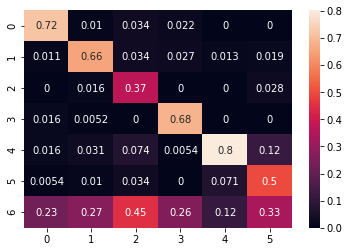

In [18]:
#visualize better
import seaborn as sns
sns.heatmap(confusion_matrix, annot=True)
